I will build Fully Connected Neural Network (FCNN)(Feedforward Neural Network(FNN))architecture

**Part 1: Platform preparation, reading data and feature engineering and training**

In [1]:

'''TensorFlow's Keras API was used to load the Fashion MNIST
dataset to train image classification models'''

import tensorflow as tf # for DL framework

#I will Load the Fashion MNIST dataset using keras function which is already splitted :

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# to check and read the shapes of the datasets( images should be 3D and labels 1D for both train and test data )
print(f"The Train_Images Shape is: {train_images.shape}")
print(f"The Train_labels Shape is: {train_labels.shape}")
print(f"The Test_Images Shape is: {test_images.shape}")
print(f"The Test_labels Shape is: {test_labels.shape}")

The Train_Images Shape is: (60000, 28, 28)
The Train_labels Shape is: (60000,)
The Test_Images Shape is: (10000, 28, 28)
The Test_labels Shape is: (10000,)


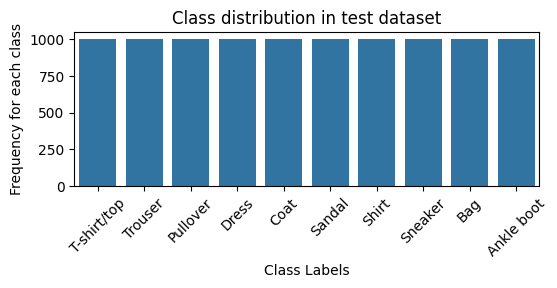

In [3]:

# Visualize the distribution of classes in the test (validation)  for understanding whether the dataset is balanced or imbalanced
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,2))  # figure size
sns.countplot(x=test_labels)  # shows the frequency of each class label in the test set
plt.title("Class distribution in test dataset")  # Title for the plot
plt.xlabel("Class Labels")  # Label for x-axis
plt.ylabel("Frequency for each class")  # Label for y-axis
plt.xticks(ticks=range(10), labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"], rotation=45)
plt.show()

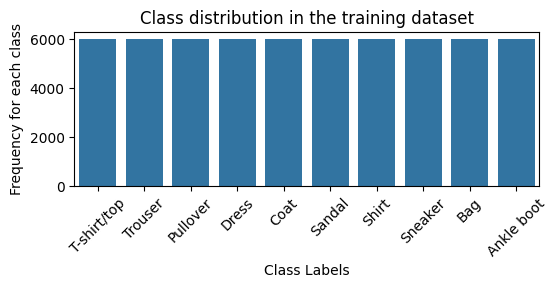

In [4]:

# Visualize the distribution of classes in the train labels
plt.figure(figsize=(6,2))  # figure size
sns.countplot(x=train_labels)
plt.title("Class distribution in the training dataset")  # Title for the plot
plt.xlabel("Class Labels")  # Label for x-axis
plt.ylabel("Frequency for each class")  # Label for y-axis
plt.xticks(ticks=range(10), labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"], rotation=45)
plt.show()

In [5]:
'''(feature engineering)Normalize the images For neural networks
training step, to a range between 0 and 1
to make the data more  understandable as input for the network
   pixel value for this data set  could be anything between
    0 and 255 before normalization'''

train_images = train_images / 255.0 #divides each pixel value by 255
test_images = test_images / 255.0


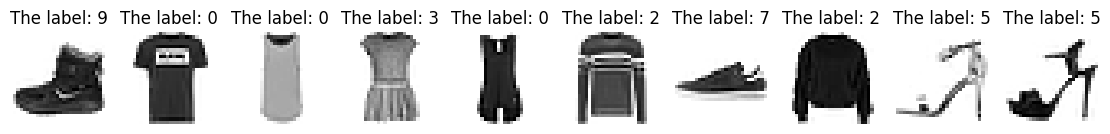

In [6]:

# Visualize some images with their labels
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))  # Figure size (10x10 inches)

for i in range(10):  # Loop through the first 10 images (from i = 0 to i = 9)
    plt.subplot(1, 10, i+1)  # Only 1 row of subplots, 10 columns and how to place the image
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Show image in index i with black and white
    plt.title(f"The label: {train_labels[i]}")  # Put title with label
    plt.axis('off')  # For image to be clear
plt.show()

**Part 2: Define the model and parameters and start training: :**

In [7]:
''' Build the model using Keras and TensorFlow
and  define the neural network model as per assignment:
1-Two hidden layers with a Sigmoid activation function.
2-The Stochastic Gradient Descent (SGD) optimizer.
3-Cross-entropy loss for multi-class classification.'''

from tensorflow.keras.models import Sequential#this class to define a linear stack of layers
from tensorflow.keras.layers import Dense, Flatten, Input# to build the layer and make the image 1 D
from tensorflow.keras.optimizers import SGD #to build the model's weights

model_Sigmoid = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer for image 28x28 pixels,1 channel
    Flatten(),  # Flatten the 28x28 image into a 784-length vector
    Dense(128, activation='sigmoid'),  # First hidden layer with 128 neurons and Sigmoid activation
    Dense(128, activation='sigmoid'),  # Second hidden layer with 128 neurons and Sigmoid activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons
     #(one for each class)sum of all the output values is 1
])



In [8]:
'''compile the neural network model with specific configurations:
 SGD optimizer to minimize
categorical cross-entropy loss which is used for multi-class
classification tasks and to track the percentage of correctly
predicted samples out of the total samples during training'''

model_Sigmoid.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])



In [11]:

'''The metrics_of_Sigmoid will store the model's performance (loss and accuracy)
for both the training and validation datasets,
train the model with epochs=10 and batch_size=1000'''

metrics_of_Sigmoid  = model_Sigmoid.fit(train_images,
                    tf.keras.utils.to_categorical(train_labels, 10),
                                        # Convert labels to one-hot encoding
                    epochs=10,# 10 full pass
                    batch_size=1000,
                    validation_data=(test_images, tf.keras.utils.to_categorical(test_labels, 10)))
# to assess the generalization


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5971 - loss: 1.9468 - val_accuracy: 0.5902 - val_loss: 1.9259
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5933 - loss: 1.9163 - val_accuracy: 0.5953 - val_loss: 1.8957
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6003 - loss: 1.8864 - val_accuracy: 0.5904 - val_loss: 1.8650
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5957 - loss: 1.8562 - val_accuracy: 0.5803 - val_loss: 1.8341
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5841 - loss: 1.8253 - val_accuracy: 0.6002 - val_loss: 1.8032
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5974 - loss: 1.7931 - val_accuracy: 0.5948 - val_loss: 1.7727
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5937 - loss: 1.7624 - val_accuracy: 0.5928 - val_loss: 1.7426
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5937 - loss: 1.7313 - val_accuracy: 0.5846 - v

In [12]:
# check the training and test loss/accuracy

train_loss_Sigmoid = metrics_of_Sigmoid.history['loss']#to list training loss for each epoch
train_accuracy_Sigmoid  = metrics_of_Sigmoid.history['accuracy']# accurecy in prediction for each epoch
test_loss_Sigmoid  = metrics_of_Sigmoid.history['val_loss']#performance of model on the test data
test_accuracy_Sigmoid  = metrics_of_Sigmoid.history['val_accuracy']# accurecy in prediction for each epoch in test data

# show some result

print("Train_loss is:", train_loss_Sigmoid )
print("Train_accuracy is:", train_accuracy_Sigmoid )
print("Test_loss is:", test_loss_Sigmoid )
print("Test_accuracy is:", test_accuracy_Sigmoid)

Train_loss is: [1.9393315315246582, 1.909323811531067, 1.878700613975525, 1.8476899862289429, 1.8166465759277344, 1.785804033279419, 1.7553569078445435, 1.725454568862915, 1.6962954998016357, 1.6679011583328247]
Train_accuracy is: [0.5957000255584717, 0.59375, 0.597266674041748, 0.5958666801452637, 0.5861166715621948, 0.5930500030517578, 0.5932666659355164, 0.5952500104904175, 0.5878833532333374, 0.6010833382606506]
Test_loss is: [1.9259412288665771, 1.8956944942474365, 1.8649780750274658, 1.8340654373168945, 1.8032128810882568, 1.7726644277572632, 1.7426167726516724, 1.7132376432418823, 1.684592366218567, 1.6567667722702026]
Test_accuracy is: [0.5902000069618225, 0.595300018787384, 0.590399980545044, 0.580299973487854, 0.6001999974250793, 0.5947999954223633, 0.5928000211715698, 0.5845999717712402, 0.6000999808311462, 0.5885999798774719]


 **Part 3: Repeat Part 2 implementing the following:**

I will Replace the Sigmoid Activation function with ReLu and examine the results,
then I will use Dropout regularization to see the changes to the outcomes.

In [13]:

'''redefines a neural network using ReLU (Rectified Linear Unit)
activation functions for the hidden layers and
Softmax activation for the output layer,'''
model_relu = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  #  input shape
    tf.keras.layers.Flatten(),  # change to 1D shape
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer with ReLU activation 128 neuron
    tf.keras.layers.Dense(128, activation='relu'),   # Second hidden layer with ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons and Softmax activation,to provide a probability distribution
])

In [14]:
# Compile the model with SGD optimizer, categorical cross-entropy loss, and accuracy matrics
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
'''Train the model with epochs=10 and batch_size=1000,
store the model's performance (loss and accuracy)'''
metrics_of_relu = model_relu.fit(train_images,
                              tf.keras.utils.to_categorical(train_labels, 10),  # Convert labels to one-hot encoding
                              epochs=10,
                              batch_size=1000,
                              validation_data=(test_images, tf.keras.utils.to_categorical(test_labels, 10)))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3325 - loss: 2.0409 - val_accuracy: 0.5915 - val_loss: 1.5787
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6121 - loss: 1.4636 - val_accuracy: 0.6457 - val_loss: 1.2061
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6579 - loss: 1.1445 - val_accuracy: 0.6715 - val_loss: 1.0179
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6849 - loss: 0.9786 - val_accuracy: 0.6904 - val_loss: 0.9125
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7065 - loss: 0.8790 - val_accuracy: 0.7086 - val_loss: 0.8459
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7205 - loss: 0.8194 - val_accuracy: 0.7288 - val_loss: 0.7995
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7390 - loss: 0.7750 - val_accuracy: 0.7397 - val_loss: 0.7624
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7526 - loss: 0.7358 - val_accuracy: 0.7510 - v

In [16]:
# check the training and test loss/accuracy from history

train_loss_relu = metrics_of_relu.history['loss']
train_accuracy_relu = metrics_of_relu.history['accuracy']
test_loss_relu = metrics_of_relu.history['val_loss']
test_accuracy_relu = metrics_of_relu.history['val_accuracy']

# show some result

print("The Train loss:", train_loss_relu)
print("The Train accuracy:", train_accuracy_relu)
print("The Test loss:", test_loss_relu)
print("The Test accuracy:", test_accuracy_relu)

The Train loss: [1.8794203996658325, 1.368554711341858, 1.0938835144042969, 0.9490010142326355, 0.8625669479370117, 0.8052669167518616, 0.763322114944458, 0.7304498553276062, 0.7035692930221558, 0.680855393409729]
The Train accuracy: [0.43861666321754456, 0.6276999711990356, 0.666266679763794, 0.6908833384513855, 0.7098166942596436, 0.7280666828155518, 0.7425000071525574, 0.7559166550636292, 0.7647666931152344, 0.7744666934013367]
The Test loss: [1.5786635875701904, 1.206117033958435, 1.0178521871566772, 0.912497878074646, 0.84586501121521, 0.7995224595069885, 0.7624191641807556, 0.7339015007019043, 0.7101439237594604, 0.6896503567695618]
The Test accuracy: [0.5914999842643738, 0.6456999778747559, 0.671500027179718, 0.6904000043869019, 0.7085999846458435, 0.7287999987602234, 0.7397000193595886, 0.7509999871253967, 0.7587000131607056, 0.767799973487854]


In [17]:
'''modify the model with ReLU activation
 in the hidden layers
  and Dropout regularization to help prevent overfitting'''
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # input shape
    tf.keras.layers.Flatten(),  # Flatten the input into a 784-length vector
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer with ReLU activation
    tf.keras.layers.Dropout(0.2),  #  20% of the neurons are randomly "dropped out" (set to zero)
    tf.keras.layers.Dense(128, activation='relu'),# Second hidden layer with ReLU activation
    tf.keras.layers.Dropout(0.2),  # also dropout with 20% probability
    tf.keras.layers.Dense(10, activation='softmax')# Output layer with 10 neurons and Softmax activation
])

In [18]:
# Compile the model with SGD optimizer, categorical cross-entropy loss, and accuracy metric
model_dropout.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
''' Train the model with epochs=10 and batch_size=1000,
store the model's performance (loss and accuracy)'''
matrics_dropout = model_dropout.fit(train_images,
                                    tf.keras.utils.to_categorical(train_labels, 10),
                                    epochs=10,
                                    batch_size=1000,
                                    validation_data=(test_images, tf.keras.utils.to_categorical(test_labels, 10)))



Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1565 - loss: 2.2742 - val_accuracy: 0.5657 - val_loss: 1.8411
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4432 - loss: 1.8082 - val_accuracy: 0.6145 - val_loss: 1.4646
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5290 - loss: 1.4953 - val_accuracy: 0.6434 - val_loss: 1.2011
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5795 - loss: 1.2800 - val_accuracy: 0.6612 - val_loss: 1.0423
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6069 - loss: 1.1528 - val_accuracy: 0.6723 - val_loss: 0.9498
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6335 - loss: 1.0604 - val_accuracy: 0.6909 - val_loss: 0.8885
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6506 - loss: 0.9964 - val_accuracy: 0.7013 - val_loss: 0.8452
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6671 - loss: 0.9486 - val_accuracy: 0.7133 - v

In [20]:
# show  the training and test loss/accuracy from history

train_loss_dropout = matrics_dropout.history['loss']
train_accuracy_dropout = matrics_dropout.history['accuracy']
test_loss_dropout = matrics_dropout.history['val_loss']
test_accuracy_dropout = matrics_dropout.history['val_accuracy']

# show some result

print("The Train loss:", train_loss_dropout)
print("The Train accuracy:", train_accuracy_dropout)
print("The Test loss:", test_loss_dropout)
print("The Test accuracy:", test_accuracy_dropout)

The Train loss: [2.1332449913024902, 1.726252555847168, 1.4340695142745972, 1.2414442300796509, 1.1246567964553833, 1.0447460412979126, 0.9854498505592346, 0.9395641684532166, 0.9092100858688354, 0.8809940218925476]
The Train accuracy: [0.24443332850933075, 0.46880000829696655, 0.5440499782562256, 0.5888333320617676, 0.6149666905403137, 0.6371999979019165, 0.65461665391922, 0.6694333553314209, 0.6757833361625671, 0.6877999901771545]
The Test loss: [1.8410977125167847, 1.4645535945892334, 1.201086163520813, 1.0423375368118286, 0.9498183727264404, 0.8884754180908203, 0.8452252149581909, 0.8114796876907349, 0.7858741879463196, 0.7635250687599182]
The Test accuracy: [0.5656999945640564, 0.6144999861717224, 0.6434000134468079, 0.6611999869346619, 0.6722999811172485, 0.6909000277519226, 0.7013000249862671, 0.7132999897003174, 0.7217000126838684, 0.733299970626831]


I will compare the performance of all models with respect to their training and validation accuracy and loss across different epoches:
1- Sigmoid activation, 2- ReLU activation, 3- Dropout

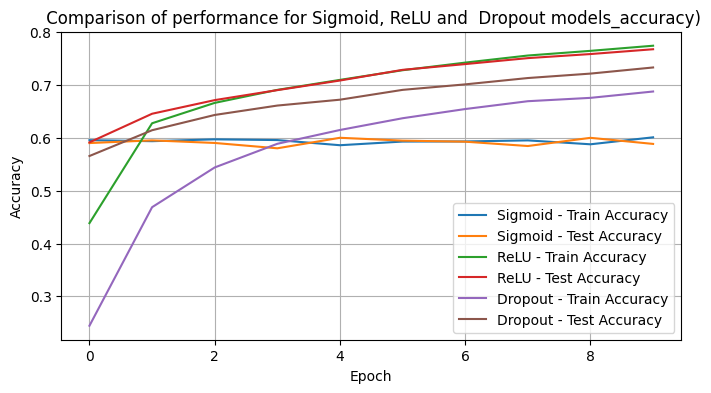

In [21]:

# Plot the training and validation accuracy for all models:

plt.figure(figsize=(8, 4))

# Sigmoid model

plt.plot(metrics_of_Sigmoid.history['accuracy'], label='Sigmoid - Train Accuracy')
plt.plot(metrics_of_Sigmoid.history['val_accuracy'], label='Sigmoid - Test Accuracy')

# ReLU model
plt.plot(metrics_of_relu.history['accuracy'], label='ReLU - Train Accuracy')
plt.plot(metrics_of_relu.history['val_accuracy'], label='ReLU - Test Accuracy')

# Dropout model
plt.plot(matrics_dropout.history['accuracy'], label='Dropout - Train Accuracy')
plt.plot(matrics_dropout.history['val_accuracy'], label='Dropout - Test Accuracy')

# Plot formatting
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title(' Comparison of performance for Sigmoid, ReLU and  Dropout models_accuracy)')
plt.grid(True)
plt.show()


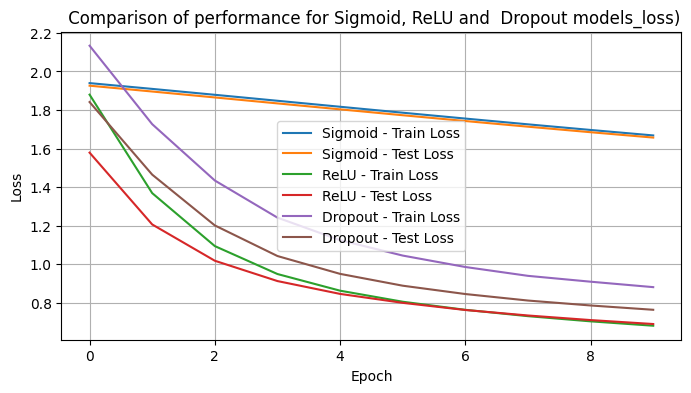

In [22]:


# Plot the training and validation loss for all models
plt.figure(figsize=(8, 4))

# Sigmoid model
plt.plot(metrics_of_Sigmoid.history['loss'], label='Sigmoid - Train Loss')
plt.plot(metrics_of_Sigmoid.history['val_loss'], label='Sigmoid - Test Loss')

# ReLU model
plt.plot(metrics_of_relu.history['loss'], label='ReLU - Train Loss')
plt.plot(metrics_of_relu.history['val_loss'], label='ReLU - Test Loss')

# Dropout model
plt.plot(matrics_dropout.history['loss'], label='Dropout - Train Loss')
plt.plot(matrics_dropout.history['val_loss'], label='Dropout - Test Loss')

# Plot formatting
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(' Comparison of performance for Sigmoid, ReLU and  Dropout models_loss)')
plt.grid(True)
plt.show()

In [23]:
# Make predictions on the test set for sigmoid model

predictions = model_Sigmoid.predict(test_images)#The predictions will be probabilities for each class

predicted_labels = tf.argmax(predictions, axis=1)#convert these probabilities into class labels

# visually check how accurate the model's predictions are on the test data.
for i in range(10):
    print(f"actual label: {test_labels[i]}, Predicted label: {predicted_labels[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
actual label: 9, Predicted label: 7
actual label: 2, Predicted label: 4
actual label: 1, Predicted label: 1
actual label: 1, Predicted label: 1
actual label: 6, Predicted label: 2
actual label: 1, Predicted label: 1
actual label: 4, Predicted label: 6
actual label: 6, Predicted label: 6
actual label: 5, Predicted label: 7
actual label: 7, Predicted label: 7


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


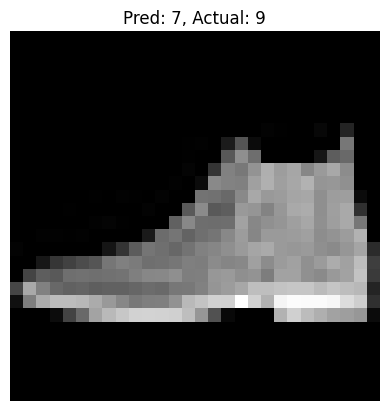

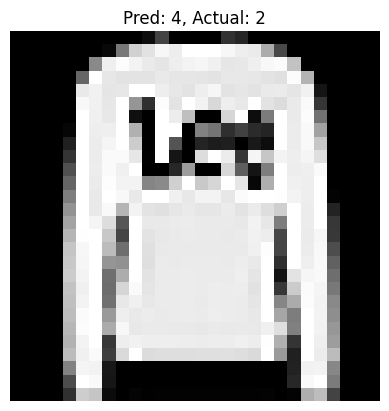

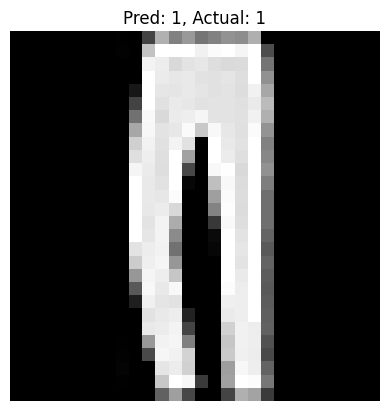

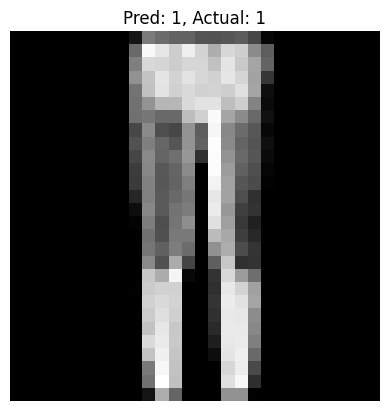

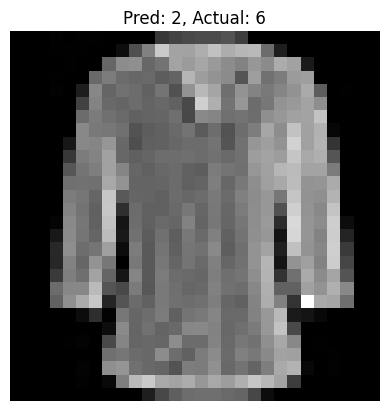

In [24]:
# visualize
import numpy as np

# Make predictions on the test set
predictions = model_Sigmoid.predict(test_images)

# Convert the predictions to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Show the first 5 test images, their predicted labels, and the actual labels
for i in range(5):
    plt.imshow(test_images[i], cmap='gray')  # Reshape the image back to 28x28 for visualization
    plt.title(f"Pred: {predicted_labels[i]}, Actual: {test_labels[i]}")
    plt.axis('off')
    plt.show()

In [25]:
# Make predictions on the test set for relu model

predictions_relu = model_relu.predict(test_images)#The predictions will be probabilities for each class

predicted_labels = tf.argmax(predictions_relu, axis=1)#convert these probabilities into class labels

# visually check how accurate the model's predictions are on the test data.
for i in range(10):
    print(f"actual label: {test_labels[i]}, Predicted label: {predicted_labels[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
actual label: 9, Predicted label: 9
actual label: 2, Predicted label: 2
actual label: 1, Predicted label: 1
actual label: 1, Predicted label: 1
actual label: 6, Predicted label: 6
actual label: 1, Predicted label: 1
actual label: 4, Predicted label: 4
actual label: 6, Predicted label: 6
actual label: 5, Predicted label: 7
actual label: 7, Predicted label: 7
